<a href="https://colab.research.google.com/github/vinaykumar1757/Predictive_Model/blob/main/Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
!pip install scikit-plot
import scikitplot as skplt

In [ ]:
!unzip "/content/archive (4).zip"

Archive:  /content/archive (4).zip
  inflating: temp.csv                


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/temp.csv")

#Attribute Information:
For more information, read [Cho et al, 2020].

station - used weather station number: 1 to 25

Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

lat - Latitude (Â°): 37.456 to 37.645

lon - Longitude (Â°): 126.826 to 127.135

DEM - Elevation (m): 12.4 to 212.3

Slope - Slope (Â°): 0.1 to 5.2

Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [ ]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [ ]:
df.shape

(7752, 25)

In [ ]:
df.drop_duplicates()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [ ]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [ ]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [ ]:
df.head(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [ ]:
data = pd.read_csv("/content/temp.csv")

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

#Feature Engineering

In [ ]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [ ]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [ ]:
data.drop(['Date'],axis=1,inplace=True)

In [ ]:
data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


#Univariate Analysis

In [ ]:
col=['DEM','day','month','Slope','year','station']

<Axes: xlabel='month', ylabel='count'>

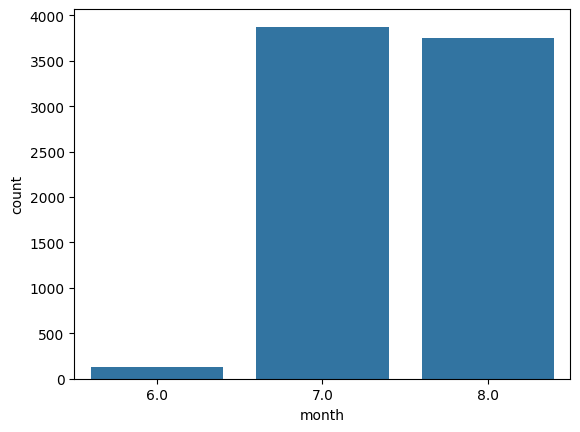

In [ ]:
sns.countplot(x='month',data=data)

<Axes: xlabel='Present_Tmax', ylabel='Density'>

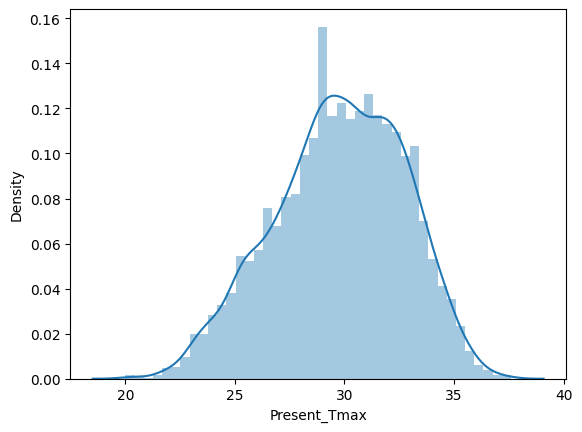

In [ ]:
sns.distplot(data['Present_Tmax'])

<Axes: xlabel='year', ylabel='Present_Tmax'>

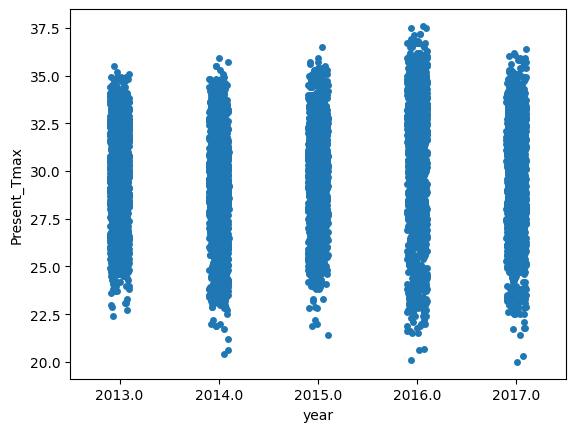

In [ ]:
sns.stripplot(x=data['year'],y=data['Present_Tmax'])

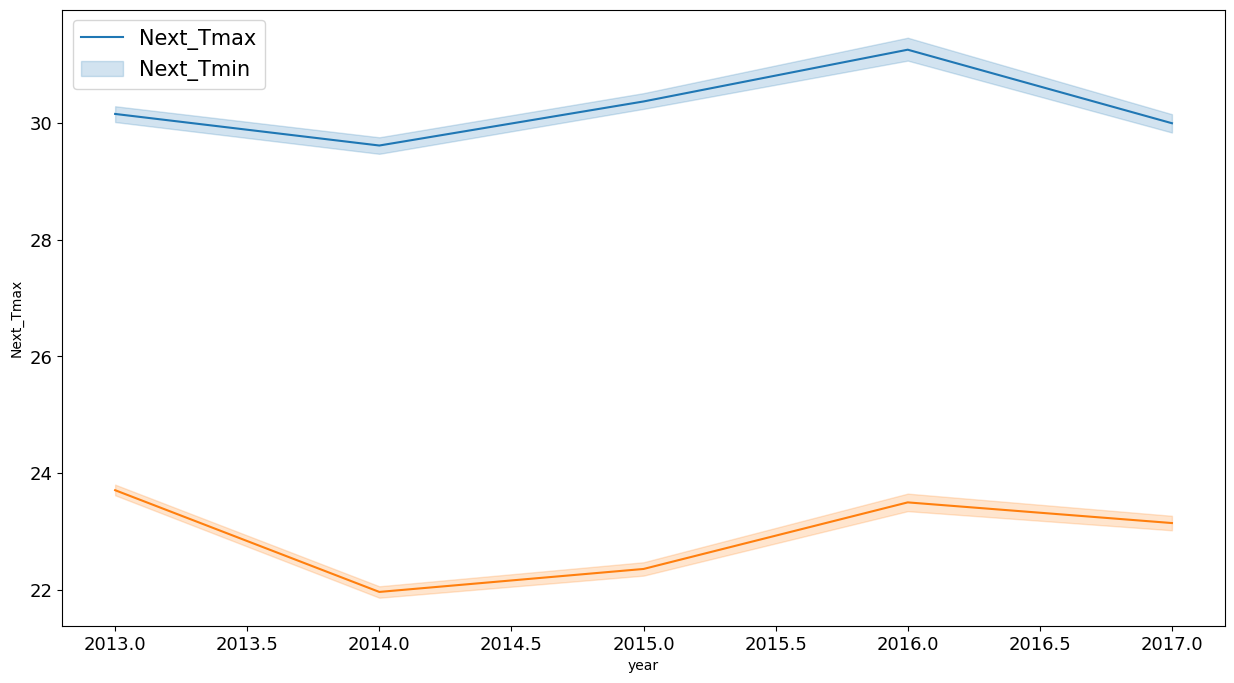

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='year',y='Next_Tmax',data=data)
sns.lineplot(x='year',y='Next_Tmin',data=data)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['Next_Tmax','Next_Tmin'],fontsize=15)
plt.show()

In [ ]:
data.head(3)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


#Preprocessing

In [ ]:
# data = pd.read_csv("/content/temp.csv")

In [ ]:
def preprocessing(df):
  df=df.copy()
  for column in ['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']:
    df[column]=df[column].fillna(df[column].mean())
  for column in ['year','month','day','station']:
    df[column]=df[column].fillna(df[column].mode()[0])
  X=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
  y=df[['Next_Tmax','Next_Tmin']]
  return X,y

In [ ]:
X,y = preprocessing(data)

In [ ]:
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,2017.0,8.0,30.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,2017.0,8.0,30.0
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,2013.0,7.0,30.0


In [ ]:
y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7747,28.3,18.1
7748,28.6,18.8
7749,27.8,17.4
7750,17.4,11.3


In [ ]:
# ['a',"b","c"] [1.0,2.3,3.3]

<Axes: >

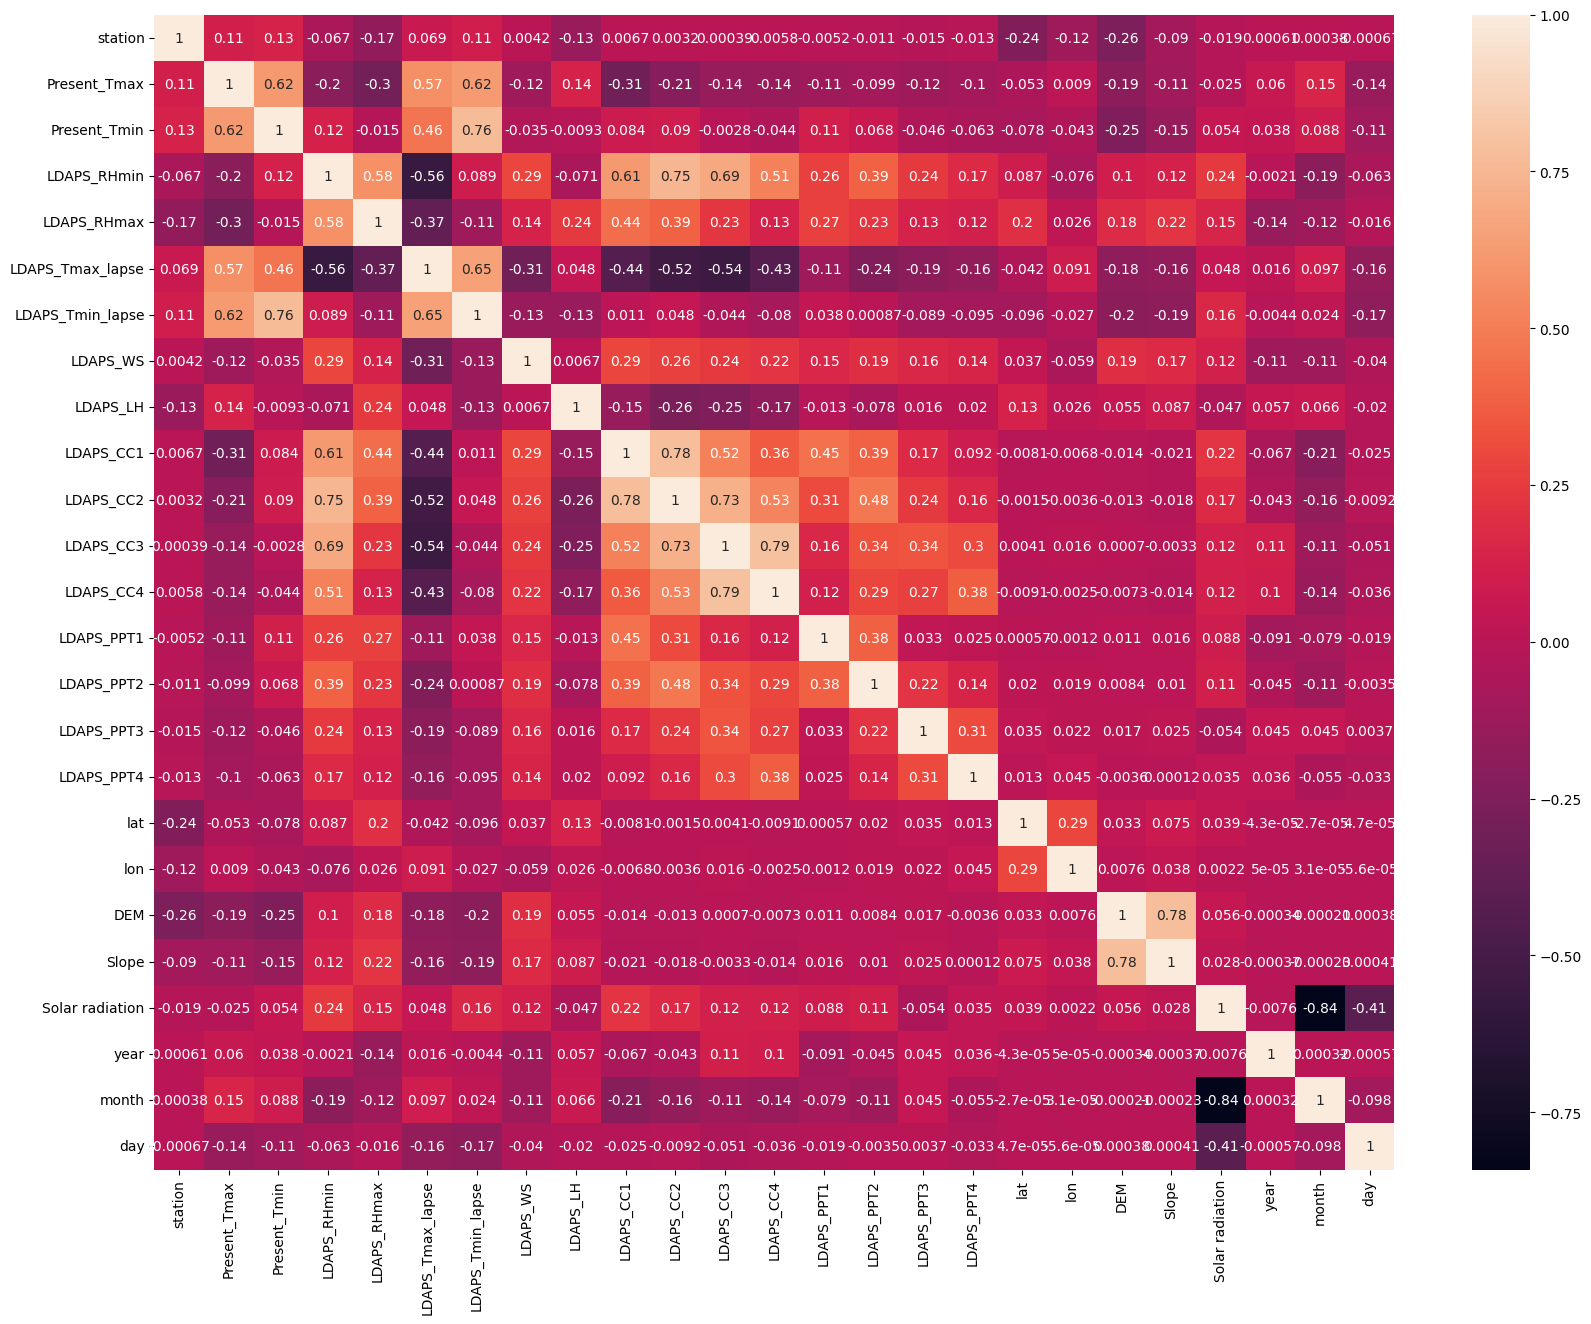

In [ ]:
x= X
X_corr=X.corr()
plt.figure(figsize=(20,15))
sns.heatmap(X_corr,annot=True)

In [ ]:
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,2017.0,8.0,30.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,2017.0,8.0,30.0
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,2013.0,7.0,30.0


In [ ]:
y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7747,28.3,18.1
7748,28.6,18.8
7749,27.8,17.4
7750,17.4,11.3


In [ ]:
[100,99,98,54,52,4,1,3,54,24]

[100, 99, 98, 54, 52, 4, 1, 3, 54, 24]

In [ ]:
99/100

0.99

In [ ]:
100/100

1.0

In [ ]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X)
X_new=pd.DataFrame(X_new,columns=x.columns)

In [ ]:
X_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,year,month,day
0,-1.663292,-0.361326,-0.759529,0.102515,0.383078,-0.524889,-0.216663,-0.128382,0.206966,-0.516243,...,-0.240636,-0.224453,1.189286,-0.005000,2.772243,1.115004,1.517935,-1.413666,-2.767613,1.570951
1,-1.524648,0.721084,-0.676296,-0.308027,0.311586,0.080895,0.223848,-0.646994,-0.314841,-0.548557,...,-0.240636,-0.224453,1.189286,0.511177,-0.315157,-0.542158,1.229950,-1.413666,-2.767613,1.570951
2,-1.386005,0.619608,0.031188,-0.552814,-0.614982,0.162936,0.451210,-0.441604,-1.249283,-0.610450,...,-0.240636,-0.224453,0.653021,0.838510,-0.526218,-0.723133,1.216534,-1.413666,-2.767613,1.570951
3,-1.247362,0.754909,0.072805,0.101426,1.133054,0.031092,-0.079874,-0.666247,0.095997,-0.583539,...,-0.240636,-0.224453,1.991696,0.385280,-0.297588,0.932424,1.201176,-1.413666,-2.767613,1.570951
4,-1.108718,0.551957,-0.551446,-0.040098,0.248765,-0.170325,-0.011187,-0.627154,1.354409,-0.832287,...,-0.240636,-0.224453,0.118743,1.807917,-0.494322,-0.548433,1.207205,-1.413666,-2.767613,1.570951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386863,-2.187892,-2.549048,-2.056591,-1.328126,-1.112066,-2.029679,-0.436683,0.284622,-1.297018,...,-0.240636,-0.224453,-0.149390,-1.263971,-0.852681,-0.803915,-2.093040,1.414396,1.003950,1.570951
7748,1.525507,-2.187892,-2.299348,-2.241619,-1.548184,-0.887662,-2.047744,-0.255421,-0.454749,-1.274658,...,-0.240636,-0.224453,-0.417522,-1.037356,-0.821213,-0.755095,-2.104553,1.414396,1.003950,1.570951
7749,1.664150,-2.221718,-2.424198,-2.317504,-1.555342,-0.570780,-2.137962,0.088072,-1.591397,-1.224577,...,-0.240636,-0.224453,-0.417522,-0.269384,-0.779043,-0.719338,-2.074325,1.414396,1.003950,1.570951
7750,-1.663292,-3.304127,-4.962817,-2.532517,-4.113443,-4.087857,-3.959146,-1.939757,-2.267499,-1.412018,...,-0.240636,-0.224453,-1.758184,-2.082302,-0.911963,-0.845455,-2.358212,-1.413666,-0.881831,1.570951


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

In [ ]:
X_train

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,year,month,day
7141,0.555003,0.754909,0.905139,-0.604556,0.066464,1.322034,0.600232,-0.609771,2.733611,-1.108893,...,-0.240636,-0.224453,1.457418,1.354688,-0.154704,-0.408689,-0.154237,1.414396,1.003950,-1.119703
3518,0.832290,-0.767229,-0.842763,-0.819199,-1.679003,-0.717700,-2.586951,0.320007,-0.483954,-0.952781,...,-0.240636,-0.220129,0.653021,-0.672255,0.243650,0.372715,0.925402,0.000365,-0.881831,0.001403
2864,0.277716,-1.917290,-0.842763,0.056419,0.733210,-0.600237,-0.590944,-0.229501,-1.128251,0.438817,...,-0.240636,-0.224453,0.118743,-0.684844,-0.586289,-0.293244,-1.242428,-0.706651,1.003950,0.561956
6007,-0.692788,0.551957,1.612623,-0.252954,-1.575078,0.433976,0.891534,-0.586895,-0.135871,0.298905,...,-0.240636,-0.224453,-1.490051,-1.024766,-0.172266,0.223191,-1.560959,0.707380,1.003950,0.786177
4949,1.664150,1.465241,0.863522,0.379243,-0.030081,-0.352302,0.294910,-1.118366,-0.288956,1.492919,...,-0.028444,0.099794,-0.417522,-0.269384,-0.779043,-0.719338,0.957184,0.707380,-0.881831,-0.559150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,-1.524648,-0.023073,0.946756,1.979633,1.291867,-0.792925,0.688821,-0.006181,-0.460467,1.917330,...,0.688072,-0.079523,1.189286,0.511177,-0.315157,-0.542158,0.551824,0.707380,-0.881831,0.786177
5390,0.416360,-0.733404,-0.343362,1.464710,0.886841,-0.056690,0.750568,-0.474569,-0.193731,1.667831,...,-0.236340,-0.224453,-1.490051,0.045358,0.376283,0.730359,0.192814,0.707380,-0.881831,1.458841
860,-0.276858,0.754909,1.321306,-0.315531,0.438210,1.218896,1.066090,-0.235091,-0.004587,0.846475,...,-0.240636,-0.224453,-0.149390,1.178432,-0.611095,-0.462470,0.026118,-1.413666,1.003950,-1.456035
7603,-1.247362,0.112229,-0.884379,-1.493497,-1.203845,-0.869904,-1.723354,0.505632,3.244108,-1.412018,...,-0.240636,-0.224453,1.991696,0.385280,-0.297588,0.932424,-1.629663,1.414396,1.003950,1.010398


In [ ]:
y_train

,Next_Tmax,Next_Tmin
7141,34.1,23.4
3518,27.7,17.6
2864,27.8,21.1
6007,33.9,26.9
4949,31.9,22.4
...,...,...
5226,28.7,24.5
5390,31.5,25.1
860,33.3,25.8
7603,29.0,19.8


In [ ]:
X_test

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,year,month,day
5082,-0.692788,-2.424669,-1.175696,0.137578,0.567018,-0.639200,-1.307494,-1.059411,-0.484888,-0.081004,...,-0.240636,-0.224453,-1.490051,-1.024766,-0.172266,0.223191,0.774696,0.707380,-0.881831,0.113513
5597,1.386863,1.769668,1.987173,0.448694,-0.537576,0.774261,1.835254,-0.696221,1.129670,-0.020593,...,-0.240457,-0.224453,-0.149390,-1.263971,-0.852681,-0.803915,-0.263460,0.707380,1.003950,-1.119703
1623,1.525507,0.213704,0.156038,1.374875,-0.107806,-2.067898,-0.878002,-0.215564,0.107884,1.261996,...,-0.025649,-0.219491,-0.417522,-1.037356,-0.821213,-0.755095,1.159267,-0.706651,-0.881831,-1.568146
6821,1.248220,-0.598103,1.029989,-0.618517,0.057130,1.284373,0.941318,-0.703627,0.806545,-0.619471,...,-0.240636,-0.224453,-0.685654,1.191021,-0.735149,-0.820115,0.509632,1.414396,-0.881831,0.898288
3892,0.693646,1.093162,1.362923,0.713295,0.253123,0.228604,0.858330,0.033964,0.454765,1.180789,...,-0.240636,-0.224453,-1.221919,0.410460,-0.099918,-0.018790,0.168821,0.000365,-0.881831,1.683062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,0.139073,-0.056898,-0.301746,0.392610,-0.128563,-0.832840,0.049005,-1.128266,-1.573530,-0.165500,...,-0.240636,-0.224453,-0.953787,-0.810742,-0.569309,-0.466338,-0.594391,-0.706651,1.003950,-0.447040
6409,-0.415501,-1.071657,0.114422,0.766760,0.507754,0.029083,0.190393,-0.060525,-0.401938,-0.450017,...,-0.240636,-0.222344,-1.758184,-0.458230,2.701715,2.861413,1.132433,1.414396,-0.881831,-0.895482
3939,0.277716,-0.192199,0.239272,0.542373,0.156570,0.503176,1.072064,1.258544,-0.845224,0.306873,...,-0.240636,-0.224453,0.118743,-0.684844,-0.586289,-0.293244,0.091804,0.000365,1.003950,-1.568146
584,-0.415501,-1.240784,0.572205,0.873851,1.322365,-1.140860,-0.644210,3.088267,0.122789,1.164957,...,-0.240636,-0.224453,-1.758184,-0.458230,2.701715,2.861413,0.581480,-1.413666,-0.881831,0.786177


In [ ]:
y_test

,Next_Tmax,Next_Tmin
5082,28.3,20.3
5597,35.9,27.5
1623,25.3,21.2
6821,35.9,25.2
3892,33.4,26.0
...,...,...
2638,27.1,21.7
6409,29.7,22.6
3939,32.3,25.0
584,26.8,22.1


In [ ]:
models={
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso()
}

In [ ]:
ETR = ExtraTreesRegressor()

In [ ]:
ETR.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
ETR.predict(X_test)

array([[28.433     , 20.314     ],
       [35.16149773, 27.2216444 ],
       [25.288     , 21.272     ],
       ...,
       [31.48774887, 25.0533222 ],
       [27.504     , 22.204     ],
       [29.48974887, 22.9193222 ]])

In [ ]:
y_test

,Next_Tmax,Next_Tmin
5082,28.3,20.3
5597,35.9,27.5
1623,25.3,21.2
6821,35.9,25.2
3892,33.4,26.0
...,...,...
2638,27.1,21.7
6409,29.7,22.6
3939,32.3,25.0
584,26.8,22.1


In [ ]:
RF = RandomForestRegressor()

In [ ]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
RF.predict(X_test)

array([[28.342     , 20.222     ],
       [35.00474887, 27.0273222 ],
       [25.377     , 21.289     ],
       ...,
       [31.646     , 25.131     ],
       [27.579     , 22.091     ],
       [29.53249773, 22.9096444 ]])

In [ ]:
y_test

,Next_Tmax,Next_Tmin
5082,28.3,20.3
5597,35.9,27.5
1623,25.3,21.2
6821,35.9,25.2
3892,33.4,26.0
...,...,...
2638,27.1,21.7
6409,29.7,22.6
3939,32.3,25.0
584,26.8,22.1


In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
LR.predict(X_test)

array([[28.43123302, 20.29957464],
       [34.60374825, 27.29517006],
       [26.56802203, 21.32059672],
       ...,
       [30.47848527, 25.13376243],
       [26.84168212, 22.31306846],
       [27.83251255, 22.12828831]])

In [ ]:
y_test

,Next_Tmax,Next_Tmin
5082,28.3,20.3
5597,35.9,27.5
1623,25.3,21.2
6821,35.9,25.2
3892,33.4,26.0
...,...,...
2638,27.1,21.7
6409,29.7,22.6
3939,32.3,25.0
584,26.8,22.1
